In [132]:
import pandas as pd

df = pd.read_csv('../air_HN.csv')
df

,date,co,no2,o3,pm10,pm25,so2,Áp suất,Hướng gió,Nhiệt độ,Sương,Sức gió,Tốc độ gió
0,30/12/2019,39,47.0,7,89,306,7,1019.7,7.2,14.0,117.0,20.0,7.4
1,31/12/2019,27,36.0,7,81,267,6,1023.2,7.2,15.0,131.0,18.0,4.8
2,1/01/2020,29,42.0,6,92,297,8,1023.8,5.6,18.0,129.0,17.0,5.1
3,2/01/2020,30,41.0,6,87,245,8,1022.1,6.9,16.0,122.0,20.0,6.3
4,3/01/2020,24,40.0,7,57,146,6,1020.5,12.7,20.0,85.0,18.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16/01/2021,33,42.0,8,67,287,14,1019.0,5.1,20.0,79.5,14.0,2.3
384,17/01/2021,12,23.0,13,65,280,6,1029.0,12.5,17.5,93.0,15.0,6.1
385,18/01/2021,34,50.0,29,56,188,5,1029.0,8.6,19.0,66.0,6.5,4.1
386,19/01/2021,27,42.0,29,58,195,15,1022.0,9.5,21.0,90.0,9.0,4.3


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        388 non-null    object 
 1   co          388 non-null    int64  
 2   no2         388 non-null    float64
 3   o3          388 non-null    int64  
 4   pm10        388 non-null    int64  
 5   pm25        388 non-null    int64  
 6   so2         388 non-null    int64  
 7   Áp suất     388 non-null    float64
 8   Hướng gió   388 non-null    float64
 9   Nhiệt độ    388 non-null    float64
 10  Sương       388 non-null    float64
 11  Sức gió     388 non-null    float64
 12  Tốc độ gió  388 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 39.5+ KB


In [135]:
correlation_matrix = df.iloc[:,1:].corr()

# Lấy chỉ số tương quan giữa các cột và cột 'pm25'
correlation_with_pm25 = correlation_matrix['pm25']

# In ra các giá trị tương quan
correlation_with_pm25

co            0.050346
no2           0.408249
o3            0.020664
pm10          0.644175
pm25          1.000000
so2           0.040785
Áp suất       0.491977
Hướng gió    -0.343364
Nhiệt độ     -0.482752
Sương        -0.005833
Sức gió      -0.470988
Tốc độ gió   -0.261764
Name: pm25, dtype: float64

In [136]:
# Giả sử df là DataFrame hiện tại của bạn
selected_columns = ["pm25",'no2', 'pm10', 'Áp suất', 'Nhiệt độ', 'Sức gió']
df_pm25 = df.loc[:, selected_columns]

df_pm25

,pm25,no2,pm10,Áp suất,Nhiệt độ,Sức gió
0,306,47.0,89,1019.7,14.0,20.0
1,267,36.0,81,1023.2,15.0,18.0
2,297,42.0,92,1023.8,18.0,17.0
3,245,41.0,87,1022.1,16.0,20.0
4,146,40.0,57,1020.5,20.0,18.0
...,...,...,...,...,...,...
383,287,42.0,67,1019.0,20.0,14.0
384,280,23.0,65,1029.0,17.5,15.0
385,188,50.0,56,1029.0,19.0,6.5
386,195,42.0,58,1022.0,21.0,9.0


In [104]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính dừng của chuỗi thời gian
result = adfuller(df["pm25"].dropna())

# Trích xuất kết quả kiểm tra
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# In kết quả
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -1.9824527513033374
p-value: 0.29431955579242675
Critical Values:
   1%: -3.4478619826418817
   5%: -2.869257669826291
   10%: -2.570881358363513


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import acf, pacf

sns.set_context("talk")

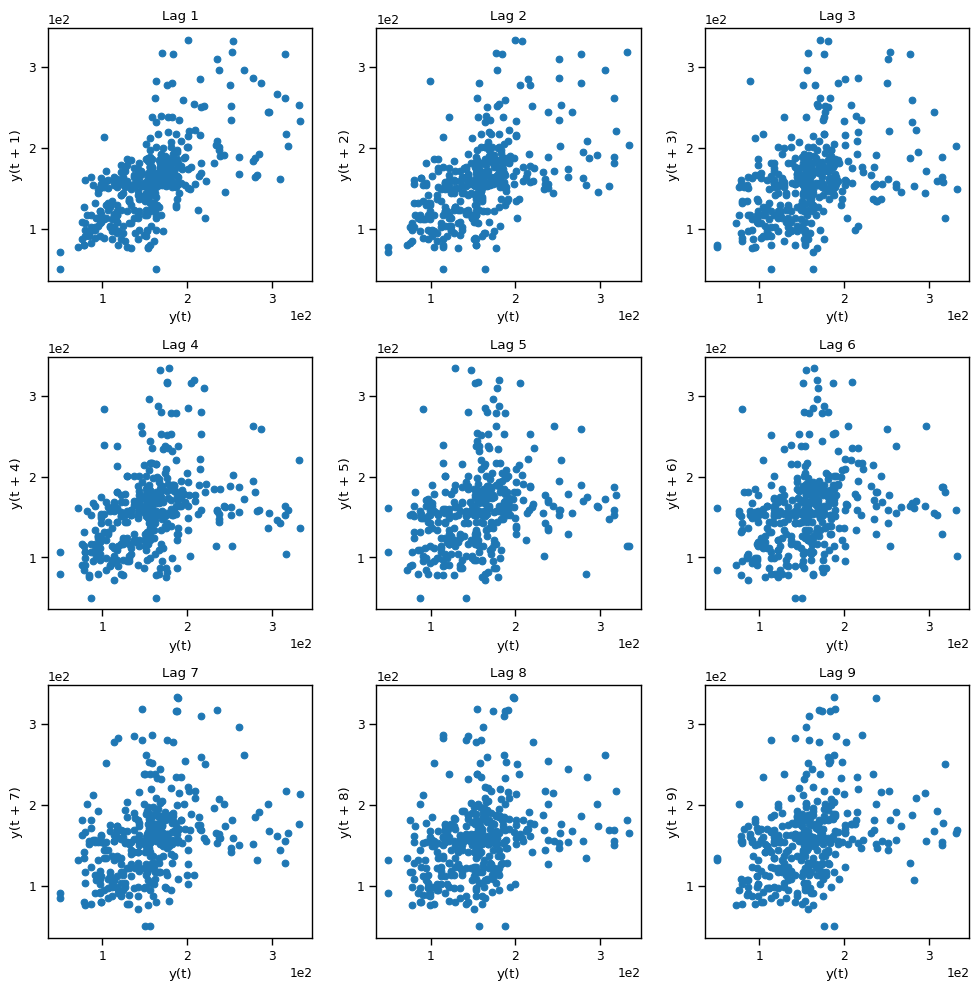

In [107]:
# trực quan mối tương quan giữa lag và dữ liệu gốc
with sns.plotting_context("paper"):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df_pm25["pm25"], lag=i+1, ax=ax_)
        ax_.set_title("Lag {}".format(i+1))
        ax_.ticklabel_format(style='sci', scilimits=(0,0))
    plt.tight_layout()

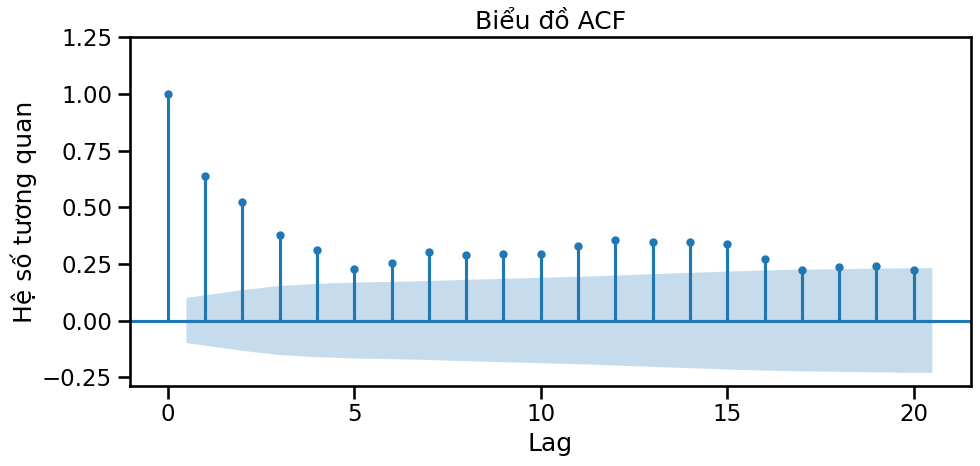

In [109]:
# plot acf of detrended time series
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(x=df_pm25["pm25"].dropna(), lags=20, ax=ax, alpha=0.05, auto_ylims=True)
ax.set_title("Biểu đồ ACF")
ax.set_ylabel("Hệ số tương quan")
ax.set_xlabel("Lag")
plt.tight_layout()

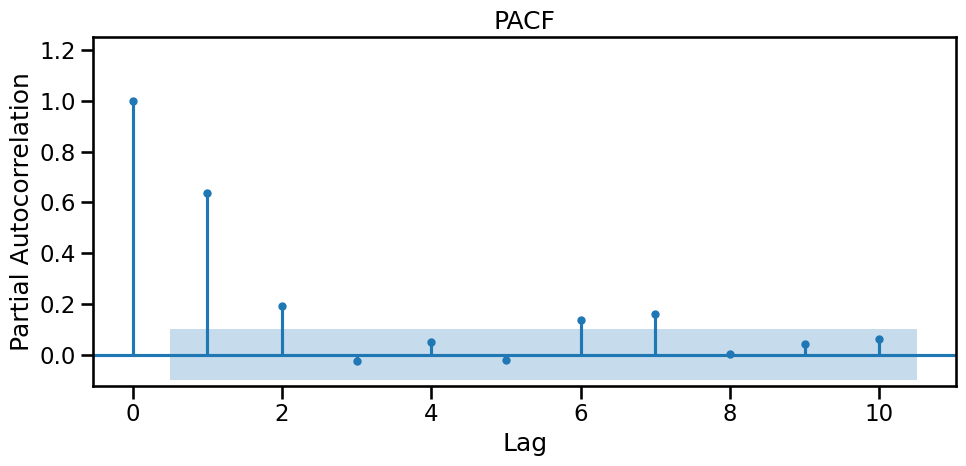

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x=df_pm25["pm25"].dropna(), lags=10, ax=ax, alpha=0.05, auto_ylims=True)
ax.set_title("PACF")
ax.set_ylabel("Partial Autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

In [113]:
df_pm25["lag_1"] = df_pm25["pm25"].shift(1)


In [114]:
df_pm25

,no2,pm10,Áp suất,Nhiệt độ,Sức gió,pm25,lag_1
0,47.0,89,1019.7,14.0,20.0,306,NaN
1,36.0,81,1023.2,15.0,18.0,267,306.0
2,42.0,92,1023.8,18.0,17.0,297,267.0
3,41.0,87,1022.1,16.0,20.0,245,297.0
4,40.0,57,1020.5,20.0,18.0,146,245.0
...,...,...,...,...,...,...,...
383,42.0,67,1019.0,20.0,14.0,287,278.0
384,23.0,65,1029.0,17.5,15.0,280,287.0
385,50.0,56,1029.0,19.0,6.5,188,280.0
386,42.0,58,1022.0,21.0,9.0,195,188.0


In [115]:
df_pm25 = df_pm25.dropna()

In [129]:
lag_periods = [2, 3, 4, 5]

# Create lag features
for lag in lag_periods:
    df_pm25[f'pm25_lag_{lag}'] = df_pm25['pm25'].shift(lag)
df_pm25

C:\Users\duyen\AppData\Local\Temp\ipykernel_5820\995542626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25[f'pm25_lag_{lag}'] = df_pm25['pm25'].shift(lag)


,no2,pm10,Áp suất,Nhiệt độ,Sức gió,pm25,lag_1,pm25_lag_2,pm25_lag_3,pm25_lag_4,pm25_lag_5
6,31.0,57,1020.0,19.0,20.0,155,172.0,NaN,NaN,NaN,NaN
7,27.0,58,1019.0,21.0,20.0,162,155.0,NaN,NaN,NaN,NaN
8,46.0,71,1019.0,25.0,20.0,262,162.0,155.0,NaN,NaN,NaN
9,27.0,64,1019.0,23.0,20.0,168,262.0,162.0,155.0,NaN,NaN
10,34.0,65,1018.0,20.0,20.0,174,168.0,262.0,162.0,155.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,42.0,67,1019.0,20.0,14.0,287,278.0,251.0,217.0,166.0,181.0
384,23.0,65,1029.0,17.5,15.0,280,287.0,278.0,251.0,217.0,166.0
385,50.0,56,1029.0,19.0,6.5,188,280.0,287.0,278.0,251.0,217.0
386,42.0,58,1022.0,21.0,9.0,195,188.0,280.0,287.0,278.0,251.0


In [124]:
df_pm25 = df_pm25.dropna()

In [125]:
# import MSTL cho việc phân tích chu kỳ
from statsmodels.tsa.seasonal import MSTL
res =  MSTL(df_pm25['pm25'].interpolate(method="linear"), periods=(5)).fit()

In [127]:
df_ = pd.DataFrame(res.resid)
df_ = df_.set_index(df.index[:len(df_)])

df_

,resid
0,-20.425694
1,-5.671520
2,57.517445
3,-11.418632
4,-30.305052
...,...
377,25.408768
378,21.676968
379,-17.493407
380,-10.413806


In [121]:
def create_df_train(df):
    df = df.set_index(df.index)
    df["lag_1"] = df.shift(1)
    df["lag_7"] = df["resid"].shift(7)
    df["lag_14"] = df["resid"].shift(14)
    df["lag_1_window_5_mean"] = df["lag_1"].rolling(5).mean()
    df = df.dropna()
    return df

In [122]:
def creat_df_forecast(df, forecast_time):
    df_forecast = pd.DataFrame(index=forecast_time, columns=['resid'])
    df_forecast = pd.concat([df.tail(61), df_forecast])
    # tính giá trị cho các cột lag, window
    df_forecast['Price_lag_1'] = df_forecast['resid'].shift(1)
    df_forecast['Price_lag_7'] = df_forecast['resid'].shift(7)
    df_forecast['Price_lag_14'] = df_forecast['resid'].shift(14)
    df_forecast['Price_lag_1_window_5_mean'] = df_forecast['Price_lag_1'].rolling(5).mean()

    df_forecast.reset_index(inplace=True)
    return df_forecast

In [123]:
def create_forecast_time(df_train):
    # tạo forecast time start từ ngày cuối cùng của dữ liệu train + 1 ngày làm việc
    forecast_time_start = df_train.index[-1] + pd.Timedelta(days=1)
    forecast_time_end = forecast_time_start + pd.Timedelta(days=6)
    forecast_time = pd.date_range(start=forecast_time_start, end=forecast_time_end, freq="B")
    return forecast_time

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [130]:
result = []
def predict(df_, X_train, y_train):
    model = SARIMAX(endog=y_train, order=(1, 0, 1), seasonal_order=(4, 0, 1, 20))
    results = model.fit()
    start = len(X_train)
    end = len(X_train) + 4
    predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMAX Predictions')
    result.append(predictions)
    return result

# dự đoán 5 ngày 1
# tạo vòng lặp for chạy từ -65 đến -1 với khoảng cách là 5
for i in range(-14, 0, 7):
    if i == 0:
        forecast_time = create_forecast_time(df_) # tạo index cho dữ liệu dự báo
        df_train = create_df_train(df_) # tạo dữ liệu train
        df_forecast = creat_df_forecast(df_, forecast_time) # tạo dữ liệu dự báo
    else:
        forecast_time = create_forecast_time(df_[:i]) # tạo index cho dữ liệu dự báo
        df_train = create_df_train(df_[:i]) # tạo dữ liệu train
        df_forecast = creat_df_forecast(df_[:i], forecast_time) # tạo dữ liệu dự báo
        # huấn luyện model
    X_train = df_train.drop(columns=['resid'])
    y_train = df_train['resid']

    predict(df_, X_train, y_train)

TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'